In [1]:
from keras.layers import Input, Conv2D, BatchNormalization, GlobalAvgPool2D, ReLU, MaxPooling2D, AveragePooling2D, Concatenate, GlobalMaxPooling2D, Dropout, Dense, Lambda, Reshape, Activation, Multiply, Add
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from keras.layers import Input, Dropout, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pywt 
import sys
sys.path.append("/root/autodl-tmp/training_tool/")
from training_tool import load_data, draw_curve, draw_matrix, TimeHistory

2025-04-11 11:36:52.949103: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


100%|██████████| 186/186 [00:01<00:00, 146.97it/s]


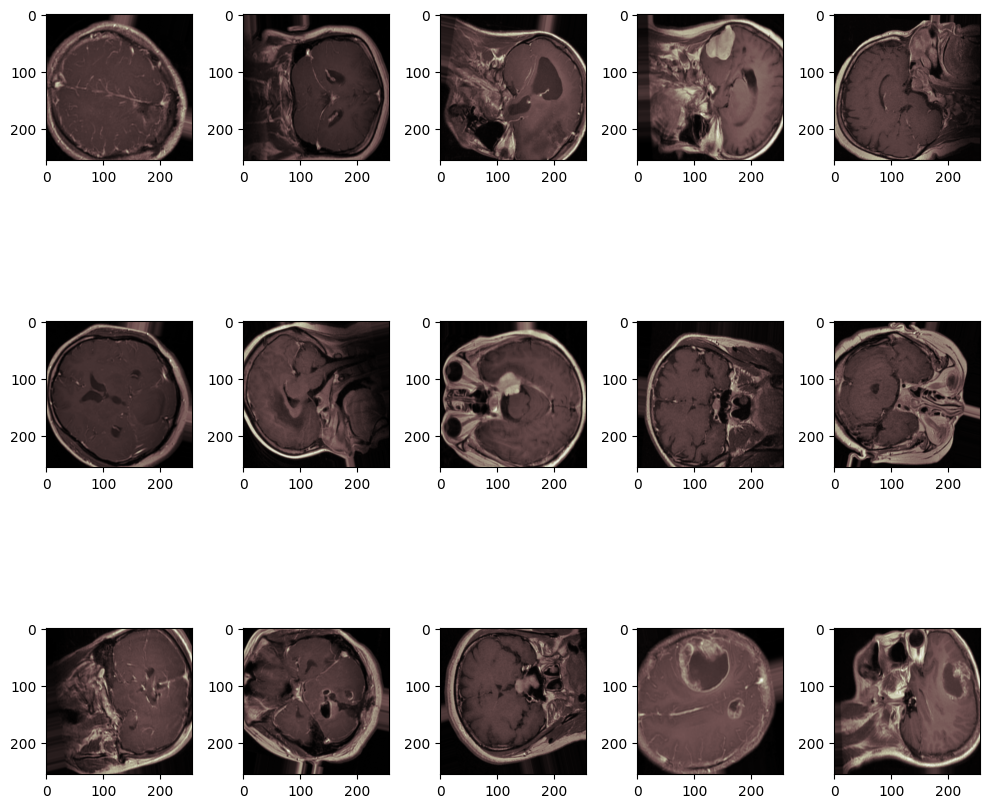

(614, 256, 256, 3)
(10534, 256, 256, 3)
(614, 3)
(10534, 3)


In [2]:
labels = ['glioma', 'meningioma', 'pituitary']
data_path = '/root/autodl-tmp/dataset/figshare_MBTD/augmented'
image_size = 256
x_train, x_test, y_train, y_test = load_data(data_path, labels, image_size)

In [3]:
def load_model():

    K.clear_session()
    inputs = Input(shape=(256, 256, 3))

    x = Conv2D(16, 3, padding='same', kernel_initializer='he_normal', use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    a_tensor = Conv2D(32, 3, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    a_tensor = BatchNormalization()(a_tensor)
    a_tensor = MaxPooling2D()(a_tensor)
    b_tensor = Conv2D(32, 5, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    b_tensor = BatchNormalization()(b_tensor)
    b_tensor = MaxPooling2D()(b_tensor)
    x = Concatenate()([a_tensor, b_tensor])
    x = Conv2D(64, 3, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    a_tensor = Conv2D(128, 3, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    a_tensor = BatchNormalization()(a_tensor)
    a_tensor = MaxPooling2D()(a_tensor)
    b_tensor = Conv2D(128, 5, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    b_tensor = BatchNormalization()(b_tensor)
    b_tensor = MaxPooling2D()(b_tensor)
    x = Concatenate()([a_tensor, b_tensor])
    x = Conv2D(256, 3, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)

    a_tensor = Conv2D(512, 3, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    a_tensor = BatchNormalization()(a_tensor)
    a_tensor = MaxPooling2D()(a_tensor)
    b_tensor = Conv2D(512, 5, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    b_tensor = BatchNormalization()(b_tensor)
    b_tensor = MaxPooling2D()(b_tensor)
    x = Concatenate()([a_tensor, b_tensor])
    x = Conv2D(1024, 3, padding='same', kernel_initializer='he_normal', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
    
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(3, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=x)
    
    return model

In [4]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2025-04-11 11:38:28.384504: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-11 11:38:28.552985: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22321 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090 D, pci bus id: 0000:99:00.0, compute capability: 8.9


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  432         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-LiMSNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])

Epoch 1/50
264/264 [==============================] - ETA: 0s - loss: 0.8114 - accuracy: 0.7170
Epoch 1: saving model to model-LiMSNet.h5
Epoch 1: 11.10 seconds
264/264 [==============================] - 11s 36ms/step - loss: 0.8114 - accuracy: 0.7170 - val_loss: 3.9062 - val_accuracy: 0.3871 - lr: 1.0000e-04
Epoch 2/50
264/264 [==============================] - ETA: 0s - loss: 0.4673 - accuracy: 0.8309
Epoch 2: saving model to model-LiMSNet.h5
Epoch 2: 9.86 seconds
264/264 [==============================] - 10s 37ms/step - loss: 0.4673 - accuracy: 0.8309 - val_loss: 1.1966 - val_accuracy: 0.6698 - lr: 1.0000e-04
Epoch 3/50
264/264 [==============================] - ETA: 0s - loss: 0.3409 - accuracy: 0.8715
Epoch 3: saving model to model-LiMSNet.h5
Epoch 3: 7.95 seconds
264/264 [==============================] - 8s 30ms/step - loss: 0.3409 - accuracy: 0.8715 - val_loss: 0.7397 - val_accuracy: 0.7467 - lr: 1.0000e-04
Epoch 4/50
262/264 [============================>.] - ETA: 0s - loss: 

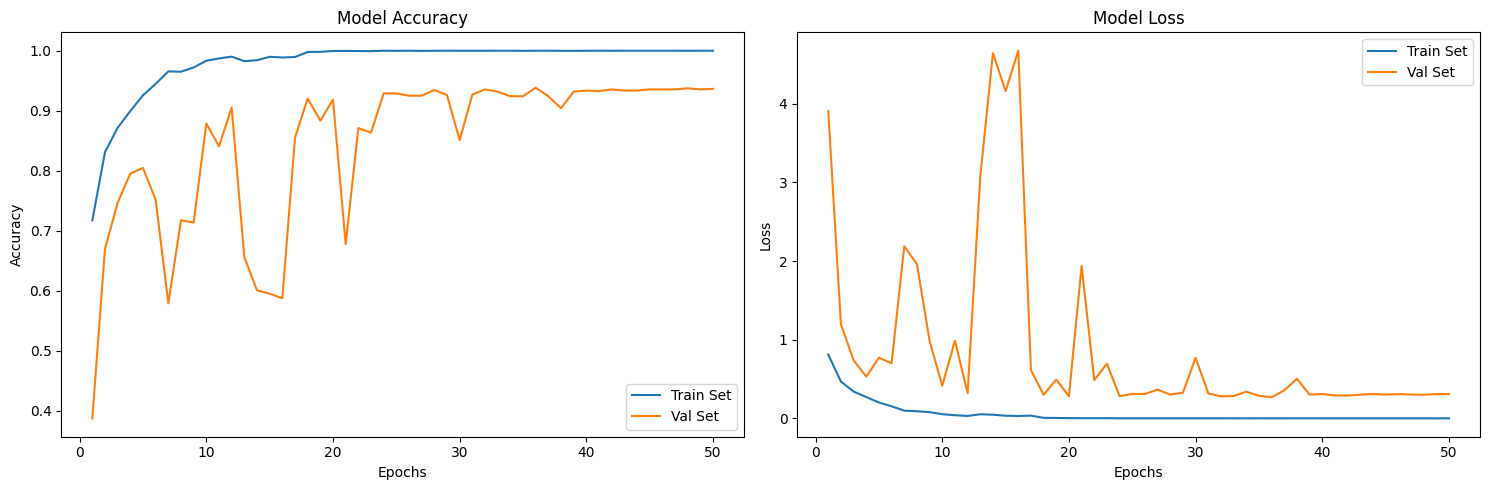

20/20 [==============================] - 0s 11ms/step - loss: 0.3753 - accuracy: 0.9121
Test Accuracy:  91.21
              precision    recall  f1-score   support

      glioma     0.9731    0.8846    0.9267       286
  meningioma     0.7844    0.9225    0.8479       142
   pituitary     0.9412    0.9462    0.9437       186

    accuracy                         0.9121       614
   macro avg     0.8996    0.9178    0.9061       614
weighted avg     0.9198    0.9121    0.9136       614



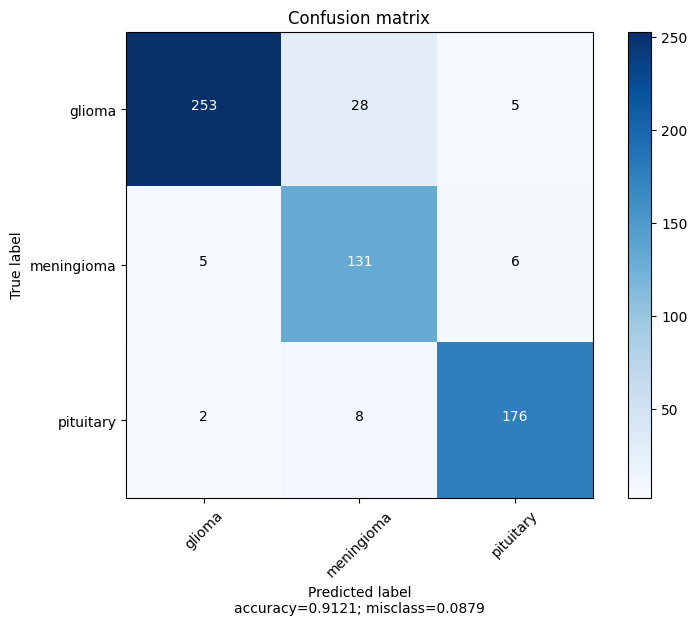

In [11]:
draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

Epoch 1/50
262/264 [============================>.] - ETA: 0s - loss: 0.7960 - accuracy: 0.7143
Epoch 1: saving model to model-LiMSNet.h5
Epoch 1: 9.95 seconds
264/264 [==============================] - 10s 34ms/step - loss: 0.7952 - accuracy: 0.7146 - val_loss: 2.7626 - val_accuracy: 0.4981 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.4805 - accuracy: 0.8223
Epoch 2: saving model to model-LiMSNet.h5
Epoch 2: 8.42 seconds
264/264 [==============================] - 8s 32ms/step - loss: 0.4800 - accuracy: 0.8226 - val_loss: 0.8098 - val_accuracy: 0.6964 - lr: 1.0000e-04
Epoch 3/50
262/264 [============================>.] - ETA: 0s - loss: 0.3515 - accuracy: 0.8669
Epoch 3: saving model to model-LiMSNet.h5
Epoch 3: 7.41 seconds
264/264 [==============================] - 7s 28ms/step - loss: 0.3506 - accuracy: 0.8673 - val_loss: 0.8717 - val_accuracy: 0.7837 - lr: 1.0000e-04
Epoch 4/50
264/264 [==============================] - ETA: 0s - loss: 0.

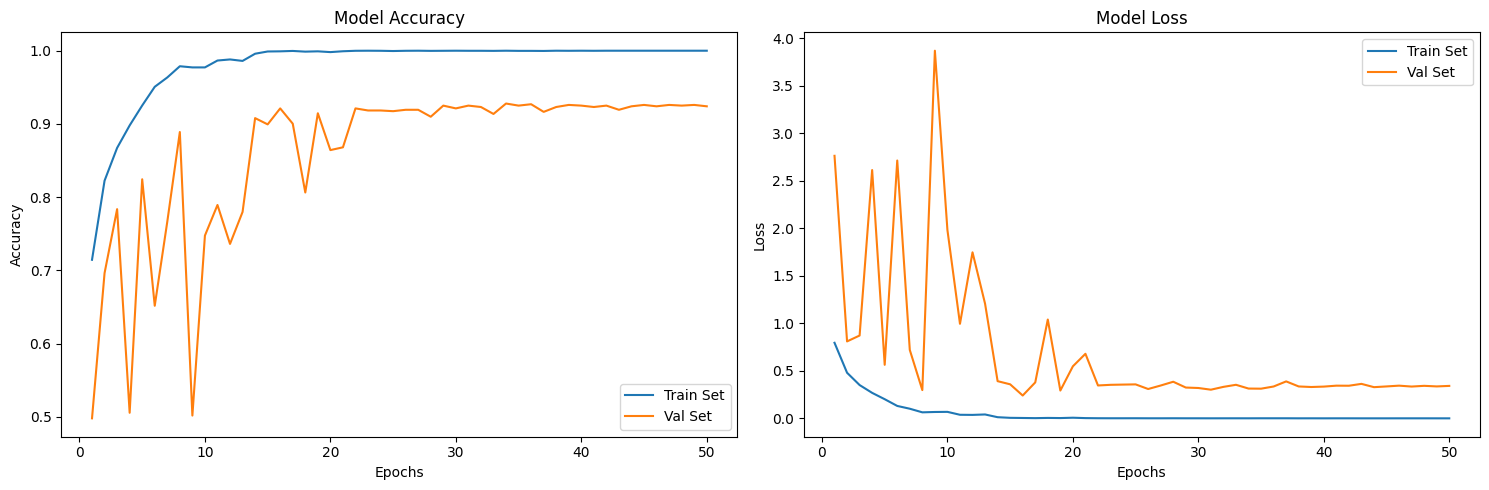

20/20 [==============================] - 0s 11ms/step - loss: 0.3408 - accuracy: 0.9235
Test Accuracy:  92.35
              precision    recall  f1-score   support

      glioma     0.9773    0.9021    0.9382       286
  meningioma     0.8153    0.9014    0.8562       142
   pituitary     0.9378    0.9731    0.9551       186

    accuracy                         0.9235       614
   macro avg     0.9101    0.9255    0.9165       614
weighted avg     0.9279    0.9235    0.9244       614



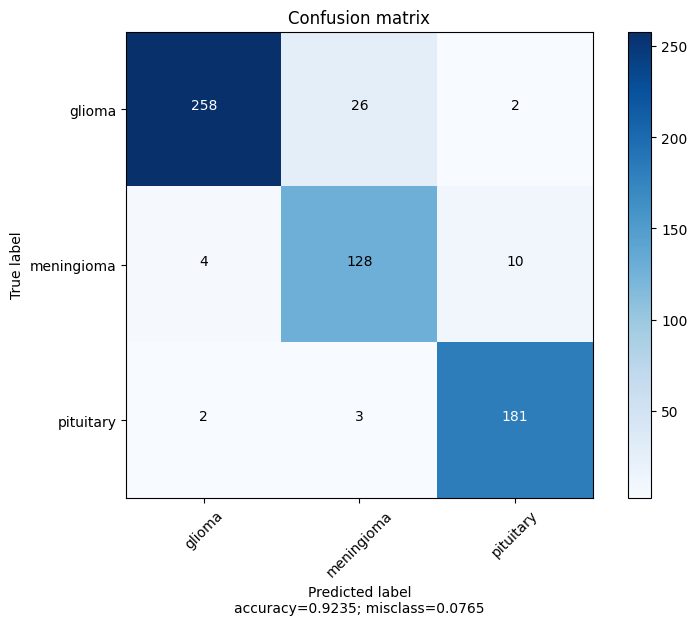

In [12]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-LiMSNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])

draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

Epoch 1/50


2025-04-11 11:39:00.369771: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2025-04-11 11:39:00.715814: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


264/264 [==============================] - ETA: 0s - loss: 0.7996 - accuracy: 0.7092
Epoch 1: saving model to model-LiMSNet.h5
Epoch 1: 13.99 seconds
264/264 [==============================] - 14s 40ms/step - loss: 0.7996 - accuracy: 0.7092 - val_loss: 4.4053 - val_accuracy: 0.3501 - lr: 1.0000e-04
Epoch 2/50
262/264 [============================>.] - ETA: 0s - loss: 0.4718 - accuracy: 0.8258
Epoch 2: saving model to model-LiMSNet.h5
Epoch 2: 9.40 seconds
264/264 [==============================] - 9s 36ms/step - loss: 0.4727 - accuracy: 0.8252 - val_loss: 2.7905 - val_accuracy: 0.3833 - lr: 1.0000e-04
Epoch 3/50
262/264 [============================>.] - ETA: 0s - loss: 0.3474 - accuracy: 0.8689
Epoch 3: saving model to model-LiMSNet.h5
Epoch 3: 8.00 seconds
264/264 [==============================] - 8s 30ms/step - loss: 0.3467 - accuracy: 0.8691 - val_loss: 0.4126 - val_accuracy: 0.8435 - lr: 1.0000e-04
Epoch 4/50
264/264 [==============================] - ETA: 0s - loss: 0.2622 - acc

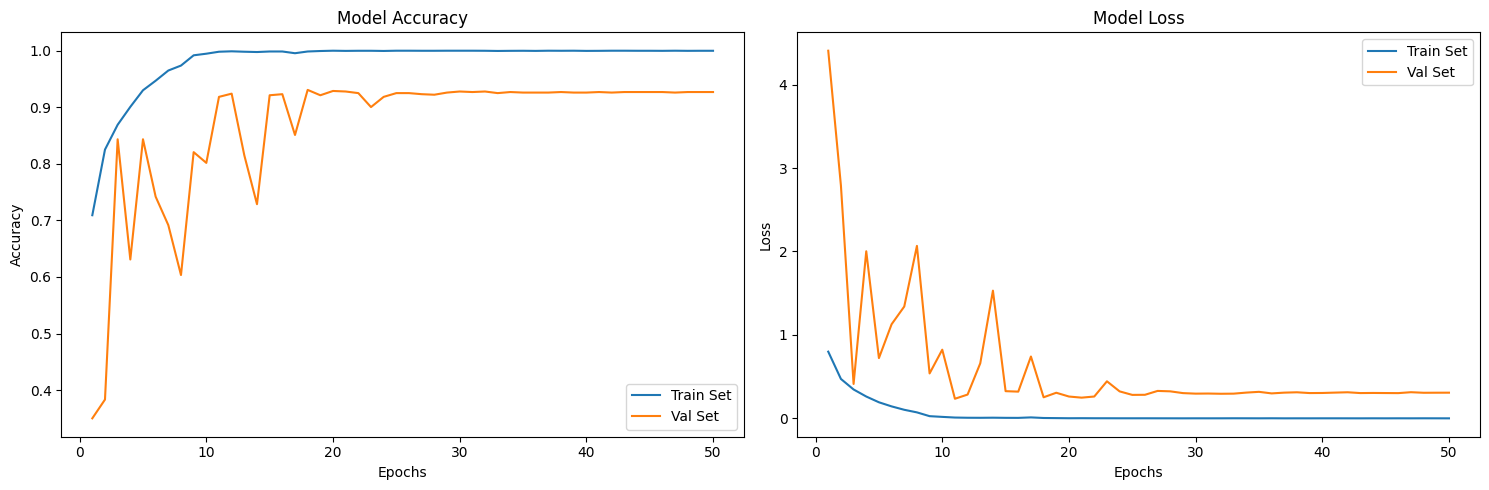

20/20 [==============================] - 0s 11ms/step - loss: 0.2954 - accuracy: 0.9267
Test Accuracy:  92.67
              precision    recall  f1-score   support

      glioma     0.9738    0.9091    0.9403       286
  meningioma     0.8205    0.9014    0.8591       142
   pituitary     0.9476    0.9731    0.9602       186

    accuracy                         0.9267       614
   macro avg     0.9140    0.9279    0.9199       614
weighted avg     0.9304    0.9267    0.9276       614



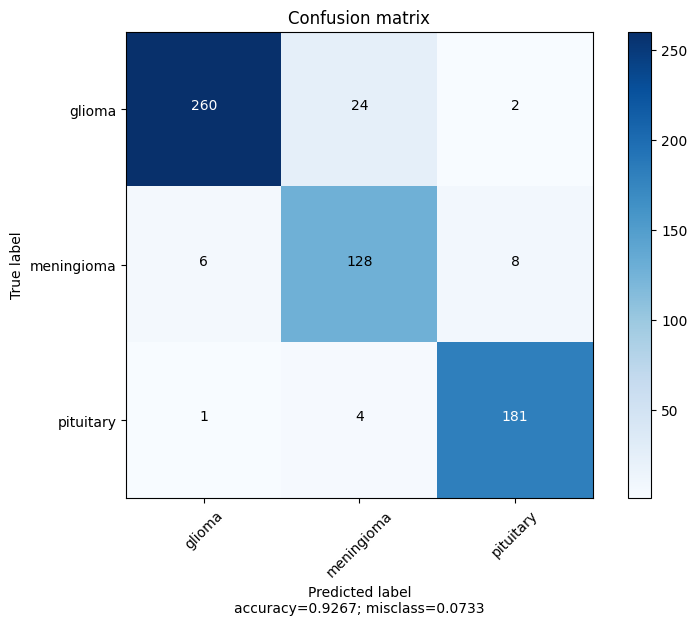

In [5]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-LiMSNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])

draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

Epoch 1/50
264/264 [==============================] - ETA: 0s - loss: 0.8244 - accuracy: 0.7104
Epoch 1: saving model to model-LiMSNet.h5
Epoch 1: 10.77 seconds
264/264 [==============================] - 11s 38ms/step - loss: 0.8244 - accuracy: 0.7104 - val_loss: 4.0003 - val_accuracy: 0.5076 - lr: 1.0000e-04
Epoch 2/50
263/264 [============================>.] - ETA: 0s - loss: 0.4600 - accuracy: 0.8248
Epoch 2: saving model to model-LiMSNet.h5
Epoch 2: 8.59 seconds
264/264 [==============================] - 9s 33ms/step - loss: 0.4597 - accuracy: 0.8248 - val_loss: 1.8139 - val_accuracy: 0.4554 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.3534 - accuracy: 0.8670
Epoch 3: saving model to model-LiMSNet.h5
Epoch 3: 7.55 seconds
264/264 [==============================] - 8s 29ms/step - loss: 0.3530 - accuracy: 0.8672 - val_loss: 1.1597 - val_accuracy: 0.5598 - lr: 1.0000e-04
Epoch 4/50
263/264 [============================>.] - ETA: 0s - loss: 0

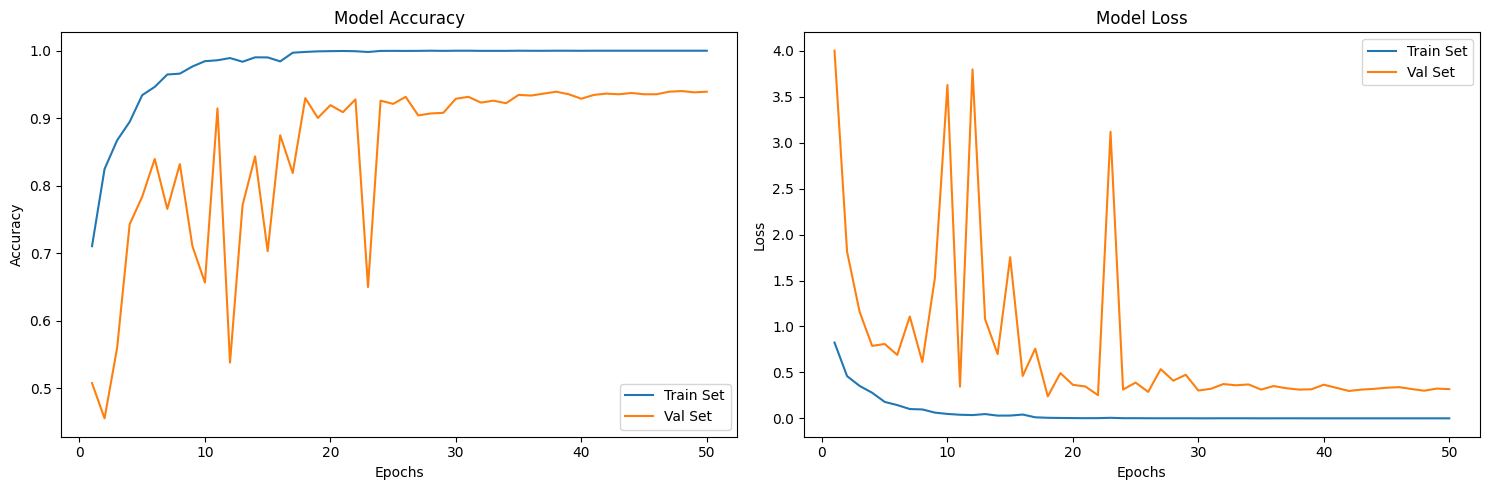

20/20 [==============================] - 0s 12ms/step - loss: 0.3681 - accuracy: 0.9218
Test Accuracy:  92.18
              precision    recall  f1-score   support

      glioma     0.9700    0.9056    0.9367       286
  meningioma     0.8000    0.9014    0.8477       142
   pituitary     0.9572    0.9624    0.9598       186

    accuracy                         0.9218       614
   macro avg     0.9091    0.9231    0.9147       614
weighted avg     0.9268    0.9218    0.9231       614



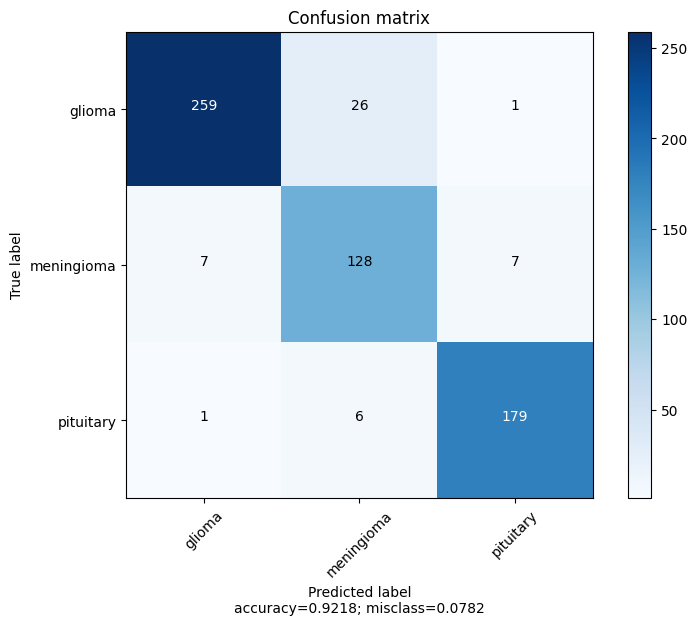

In [6]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-LiMSNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])

draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)

Epoch 1/50
262/264 [============================>.] - ETA: 0s - loss: 0.8442 - accuracy: 0.6984
Epoch 1: saving model to model-LiMSNet.h5
Epoch 1: 11.08 seconds
264/264 [==============================] - 11s 39ms/step - loss: 0.8440 - accuracy: 0.6988 - val_loss: 3.8791 - val_accuracy: 0.3529 - lr: 1.0000e-04
Epoch 2/50
262/264 [============================>.] - ETA: 0s - loss: 0.4692 - accuracy: 0.8224
Epoch 2: saving model to model-LiMSNet.h5
Epoch 2: 7.75 seconds
264/264 [==============================] - 8s 29ms/step - loss: 0.4694 - accuracy: 0.8225 - val_loss: 2.8744 - val_accuracy: 0.3748 - lr: 1.0000e-04
Epoch 3/50
263/264 [============================>.] - ETA: 0s - loss: 0.3455 - accuracy: 0.8689
Epoch 3: saving model to model-LiMSNet.h5
Epoch 3: 7.84 seconds
264/264 [==============================] - 8s 30ms/step - loss: 0.3455 - accuracy: 0.8690 - val_loss: 0.9478 - val_accuracy: 0.6433 - lr: 1.0000e-04
Epoch 4/50
262/264 [============================>.] - ETA: 0s - loss: 0

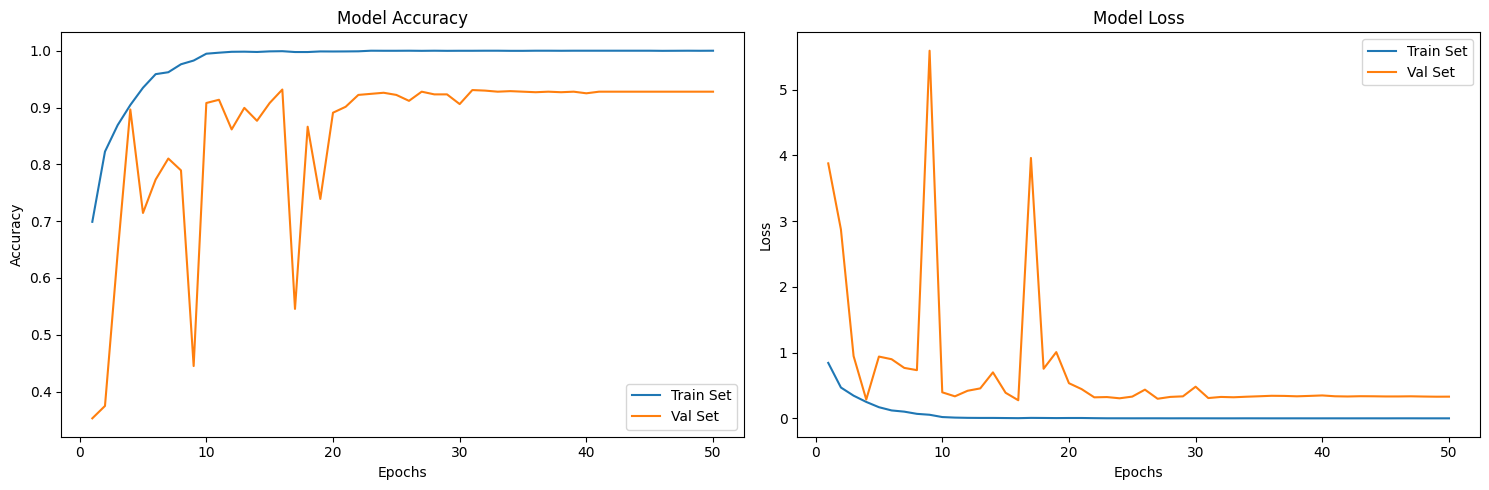

20/20 [==============================] - 0s 11ms/step - loss: 0.4245 - accuracy: 0.9137
Test Accuracy:  91.37
              precision    recall  f1-score   support

      glioma     0.9693    0.8846    0.9250       286
  meningioma     0.7844    0.9225    0.8479       142
   pituitary     0.9516    0.9516    0.9516       186

    accuracy                         0.9137       614
   macro avg     0.9018    0.9196    0.9082       614
weighted avg     0.9212    0.9137    0.9153       614



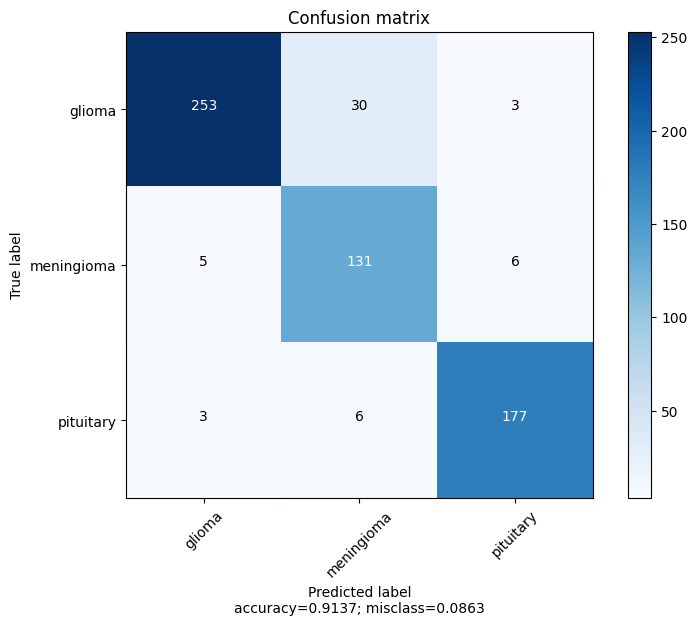

In [7]:
model = load_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


tensorboard = TensorBoard(log_dir = 'logs')
Checkpoint = ModelCheckpoint(filepath='model-LiMSNet.h5',
                             monitor='val_accuracy', verbose=1, save_best_only=False, mode='min')
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 5, min_delta = 0.001,
                              mode='auto',verbose=1)
time_callback = TimeHistory()
history = model.fit(x_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=36,
                   callbacks=[tensorboard,Checkpoint,reduce_lr, time_callback])

draw_curve(history)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
loss,acc = model.evaluate(x_test,y_test,verbose = 1)
draw_matrix(labels, y_test_new, pred, acc)